# Prevendo Doença do Coração usando Machine Learning

Este notebook tem como objetivo experimentar diversas bibliotecas de Machine Learning e Data Science baseadas na linguagem Python, de forma a construir um modelo capaz de prever se uma pessoa tem ou não doença do coração, baseando-se em seus registros médicos.

Nós iremos seguir a seguinte abordagem:

1. Definição do problema
2. Dados
3. Avaliação
4. Features (características dos dados)
5. Modelagem
6. Experimentação

## 1. Definição do Problema

> Dados parâmetros clínicos sobre um paciente, podemos nós prever se ele tem ou não doença do coração?

## 2. Dados

Os dados que vamos trabalhar podem ser encontrados em: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

Também há uma versão disponível no [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).

## 3. Avaliação

> Se conseguirmos alcançar 90% de acurácia em prever se um paciente tem ou não doença do coração durante a prova de conceito, nós proseguiremos com o projeto.

## 4. Features

**Breve Informação dos Atributos dos dados**

1. age (in years)
2. sex (1 = male, 0 = female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina (1 = yes, 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target (1 or 0)

## Preparando as Ferramentas

Usaremos pandas, matplotlib e numpy para análise de dados e manipulação.

Começaremos importando estas ferramentas necessárias.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Em seguida importaremos os modelos de Machine Learning da biblioteca Scikit-Learn.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Também importaremos ferramentas de avaliação da biblioteca Scikit-Learn.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Carregando os Dados

Uma vez que temos todas as bibliotecas e ferramentas importadas em nosso workspace, podemos finalmente carregar os nossos dados para começarmos a explorá-los.

In [4]:
df = pd.read_csv('dados/heart-disease.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Podemos confirmar com quantas **linhas** e **colunas** estamos lidando.

In [5]:
print(f'Linhas = {df.shape[0]}, Colunas = {df.shape[1]}')

Linhas = 303, Colunas = 14


## Análise Exploratória de Dados

O nosso objetivo nessa seção é conhecer melhor sobre os dados e adquirir experiência e compreensão sobre o assunto que estamos trabalhando.

A lista a seguir pode ajudar a nos guiar nesses aspectos.

1. Quais questões estamos tentando resolver?
2. Quais tipos de dados nós temos e como nós trataremos os diferentes tipos?
3. O que está faltando nos dados e como podemos lidar com isso?
4. Quais são os outliers e por que devemos nos preocupar com eles?
5. Como podemos adicionar, alterar ou remover features para aproveitarmos ao máximo os nossos dados?

Tradicionalmente podemos começar checando os dados no topo de nosso **DataFrame**.

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Também podemos checar os últimos dados no **DataFrame**.

In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Podemos descobrir quantos dados há em cada diferente classe.

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Como podemos observar, temos 165 exemplos em que a pessoa possui doença do coração, e 138 exemplos em que a pessoa não tem.

Podemos considerar que estamos lidando com um problema de classificação que está relativamente balanceado, não há uma disparidade entre as diferentes classes, os números são próximos.

Para melhor intuição, podemos também visualizar estes dados.

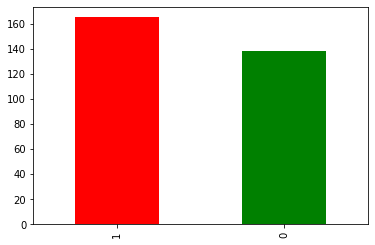

In [9]:
df['target'].value_counts().plot(kind='bar', color=['red','green']);

É interessante também que obtenhamos informações sobre tipos dos dados que estamos trabalhando.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Outro questionamento importante: Existem dados faltantes em nosso conjunto de dados?

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

O método **describe()** nos traz uma descrição geral de nossos dados, como **média**, **desvio padrão** e outras informações úteis.

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Uma vez que obtivemos um conhecimento mais apurado sobre os nossos dados, agora é interessante compararmos as suas colunas.

### Frequência de Doença Cardíaca de acordo com Sexo

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Podemos então comparar a coluna **target** com **sex**.

In [14]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Através dessa tabela, podemos inferir que das 96 mulheres, 72 possuem doença do coração, nos informando que aproximadamente 70% das mulheres possuem doença do coração (baseado exclusivamente em nosso conjunto de dados).

Já para os homens, 93 de 207 possuem doença do coração, um pouco menos de 50%.

Para ilustrar melhor esta ideia, podemos criar um gráfico.

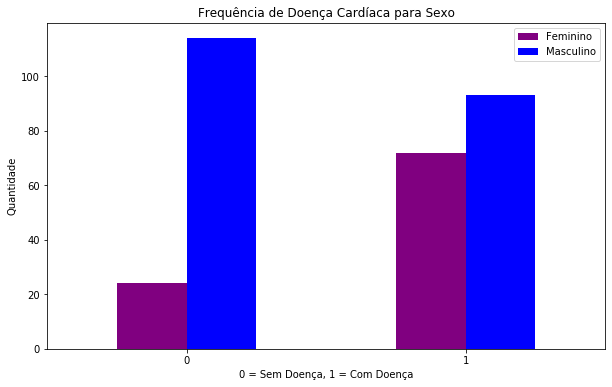

In [15]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['purple','blue']);
plt.title('Frequência de Doença Cardíaca para Sexo');
plt.xlabel('0 = Sem Doença, 1 = Com Doença');
plt.ylabel('Quantidade');
plt.legend(['Feminino','Masculino']);
plt.xticks(rotation=0);

### Idade vs Frequência Cardíaca Máxima Alcançada 

Vejamos a relação entre frequência cardíaca e idade de uma pessoa com e sem doença do coração.

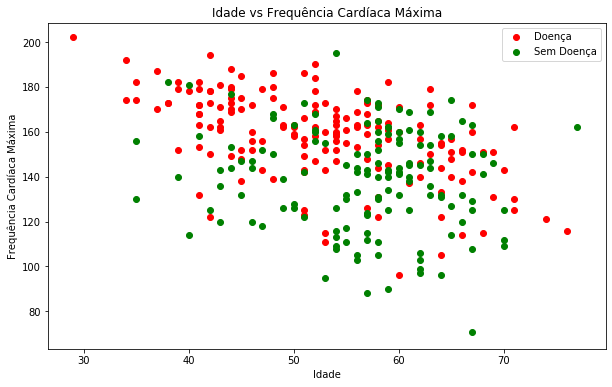

In [16]:
plt.figure(figsize=(10,6));
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c='red');
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c='green');
plt.title('Idade vs Frequência Cardíaca Máxima');
plt.xlabel('Idade');
plt.ylabel('Frequência Cardíaca Máxima');
plt.legend(['Doença','Sem Doença']);

Podemos ver que quanto mais nova a pessoa é, maior sua frequência cardíaca, em geral.

Também podemos checar a distribuição da coluna **idade** com um **histograma**.

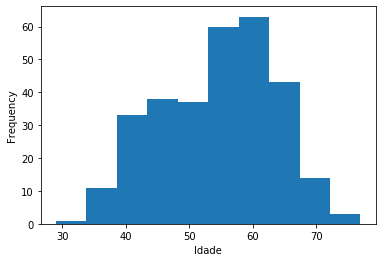

In [17]:
df['age'].plot.hist();
plt.xlabel('Idade');

Menor idade que temos:

In [18]:
df['age'].min()

29

Maior idade que temos:

In [19]:
df['age'].max()

77

### Freqüência de Doença Cardíaca por Tipo de Dor no Peito

Podemos comparar os **tipos de dores no peito** com a variável **target** que indica se uma pessoa tem ou não doença cardíaca (**0**: não, **1**: sim).

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Podemos observar, curiosamente, que 69 pessoas que possuem doença do coração, sofrem com dores no peito que não são relacionadas ao coração.

Novamente vamos tornar esse **crosstab** visual para melhor intuição.

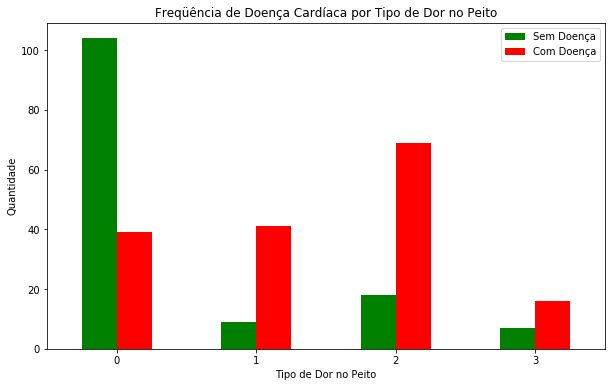

In [21]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['green','red']);
plt.title('Freqüência de Doença Cardíaca por Tipo de Dor no Peito');
plt.xlabel('Tipo de Dor no Peito');
plt.ylabel('Quantidade');
plt.legend(['Sem Doença','Com Doença']);
plt.xticks(rotation=0);

### Construir uma Matriz de Correlação

Pandas nos permite criar uma matriz de correlação para sabermos o quão relacionadas nossas colunas estão umas com as outras.

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Para melhor intuição, podemos tornar a nossa matriz de correlação mais visual com a biblioteca **sns**.

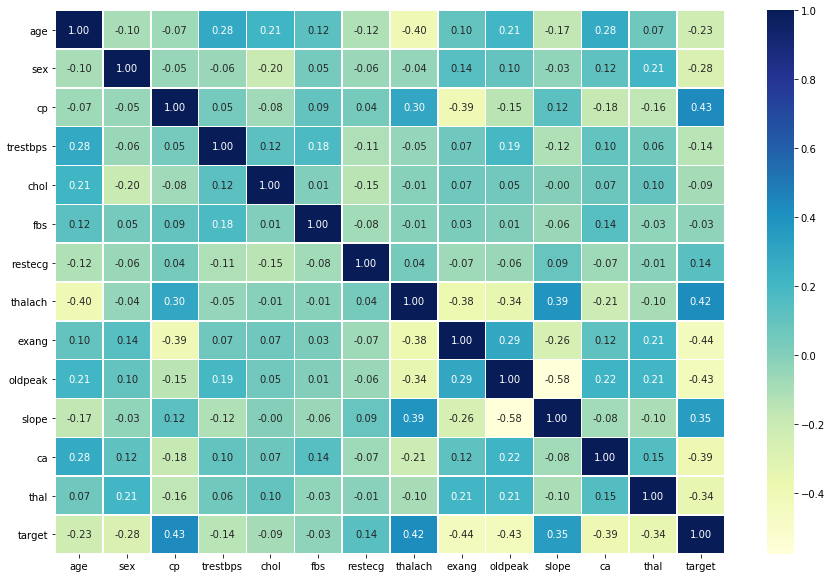

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

A diagonal principal está fornecendo uma correlação perfeita, pois está comparando as mesmas colunas (ex: **idade** com **idade**).

Também devemos saber que um valor alto positivo, nos indica uma potencial correlação positiva, o mesmo para os negativos.

Por exemplo, de acordo com a nossa matriz de correlação: conforme a dor no peito (**cp**) aumenta o valor **target** também deve aumentar, ou seja, tem mais possibilidades de termos pessoas com doença no coração.

Outro exemplo, neste caso de correlação negativa, é quando a tem dor no peito durante um exercício (**exang** = 1), suas chances de ter uma doença no coração diminuem (**target** = 0).

## 5. Modelagem

Chegou o momento de iniciarmos a construção de nosso modelo de Machine Learning.

Novamente, revisitamos os nossos dados para intuição.

In [24]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


E agora vamos dividir os nossos dados em features (**X**) e labels (**y**).

In [25]:
X = df.drop('target',axis=1)
y = df['target']

In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.tail(10)

293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

Como podemos observar, estamos lidando com um **DataFrame** com diversos features de nosso conjunto de dados e uma **Series** com a label que desejamos prever (**0** = Sem Doença, **1** = Com Doença).

Agora devemos separar os nossos dados em conjuntos de **treinamento** e **teste**.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


Agora que temos os nossos dados separamos em conjuntos de **treinamento** e **teste**, é o momento de construir um modelo de Machine Learning.

Nós treinaremos (encontrar padrões) no conjunto de treinamento.

E testaremos (usar os padrões encontrados) no conjunto de teste.

Iremos experimentar com três diferentes modelos de Machine Learning para este problema: 

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

Para melhor organização, vamos colocar os nossos modelos em um Dicionário Python.

In [30]:
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=800),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

Criaremos também uma função para ajustar e avaliar os modelos.

In [31]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Ajusta e avalia um determinado modelo de machine learning.
    modelos: um dicionário de diferentes modelos de machine learning (scikit-learn)
    X_train: dados de treinamento (sem labels)
    X_test: dados de teste (sem labels)
    y_train: labels de treinamento
    y_test: labels de teste
    """
    # Criamos um dicionário para guardar as avaliações dos modelos
    model_scores = {}
    # Faremos um Loop pelos modelos
    for name, model in models.items():
        # Ajustamos o modelo aos dados
        model.fit(X_train, y_train)
        # Avaliamos o modelo e anexamos a sua avaliação ao dicionário model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

Vejamos então quão bem cada um desses modelos é capaz de performar.

In [32]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6721311475409836,
 'Random Forest': 0.8688524590163934}

### Comparando os Modelos

Para termos uma ideia visual do desempenho dos modelos, podemos apresentá-los em um gráfico.

Lembrando que pelo fato de nossos modelos serem todos classificadores, suas métricas padrão são **accuracy**.

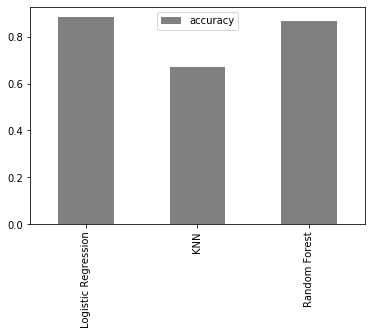

In [33]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color='gray');

Agora que temos o nosso modelo base e e sabemos que as primeiras previsões do modelo nem sempre são o que devemos basear nossos próximos passos.

O que devemos fazer?

Vejamos a seguinte lista de possíveis melhorias:

- Tunar Hiperparâmetros
- Importância de features
- Confusion Matrix
- Cross-validation
- Precision
- Recall
- F1 Score
- Classification report
- ROC Curve
- Area Under Curve (AUC)

### Tunando Hiperparâmetros

Primeiramente, vamos tunar o algoritmo KNN.

Inicialmente definiremos duas listas:

- pontuação de treinamento
- pontuação de teste

In [93]:
train_scores = []
test_scores = []

Criaremos uma lista de diferentes valores para o hiperparâmetro **n_neighbors**.

In [94]:
neighbors = list(range(1,21))

Vamos instanciar o algoritmo KNN.

In [95]:
knn = KNeighborsClassifier()

Faremos um loop através dos diferentes números de neighbors.

In [96]:
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Ajustamos os dados no algoritmo
    knn.fit(X_train, y_train)
    
    # Atualizamos a lista de pontuação de treinamento
    train_scores.append(knn.score(X_train, y_train))
    
    # Atualizamos a lista de pontuação de teste
    test_scores.append(knn.score(X_test, y_test))

Podemos agora checar ambas as listas de pontuação.

In [97]:
train_scores

[1.0,
 0.8057851239669421,
 0.7892561983471075,
 0.7892561983471075,
 0.7851239669421488,
 0.7727272727272727,
 0.743801652892562,
 0.7148760330578512,
 0.7066115702479339,
 0.6942148760330579,
 0.7024793388429752,
 0.7107438016528925,
 0.6942148760330579,
 0.6818181818181818,
 0.6942148760330579,
 0.6942148760330579,
 0.6900826446280992,
 0.6818181818181818,
 0.6735537190082644,
 0.6735537190082644]

In [98]:
test_scores

[0.4918032786885246,
 0.5409836065573771,
 0.5245901639344263,
 0.5573770491803278,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.7377049180327869,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836]

Podemos visualizar para melhor intuição.

Pontuação máxima do KNN nos dados de teste: 73.77%


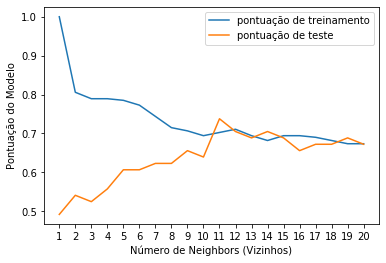

In [99]:
plt.plot(neighbors, train_scores, label='pontuação de treinamento');
plt.plot(neighbors, test_scores, label='pontuação de teste');
plt.xticks(np.arange(1,21,1));
plt.xlabel('Número de Neighbors (Vizinhos)');
plt.ylabel('Pontuação do Modelo');
plt.legend();
print(f'Pontuação máxima do KNN nos dados de teste: {max(test_scores)*100:.2f}%')

Com o hiperparâmetro neighbors setado como **11** conseguimos aumentar a nossa accuracy para 73%, um ganho aproximado de 6% em relação ao nosso experimento base inicial.

### Tunando Hiperparâmetros com RandomizedSearchCV

Dessa vez iremos tunar os nossos modelos **LogisticRegression** e **RandomForestClassifier** usando a técnica **RandomizedSearchCV**.

Primeiro vamos criar uma grid de hiperparâmetros para **LogisticRegression**.

In [41]:
log_reg_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"],
    "max_iter": [800, 900]
}

Criamos uma grid de hiperparâmetros para o algoritmo **RandomForestClassifier**.

In [42]:
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

Agora que temos nossas grids definidas para cada um de nossos modelos.

Finalmente podemos usar **RandomizedSearchCV**.

In [43]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

E agora ajustamos o modelo de busca aleatória ao nossos dados.

In [44]:
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

Vejamos quais são os melhores parâmetros.

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 800, 'C': 0.615848211066026}

In [46]:
rs_log_reg.score(X_test, y_test)

0.9016393442622951

Como podemos observar, nosso modelo teve uma melhoria em relação ao anterior que definimos, seu desempenho foi aprimorado.

Agora faremos o mesmo com o algoritmo **RandomForestClassifier**, vamos tentar aprimorar seu desempenho.

In [47]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Vejamos os melhores hiperparâmetros.

In [48]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': None}

E então avaliamos o seu desempenho.

In [49]:
rs_rf.score(X_test, y_test)

0.8688524590163934

Dessa vez, nosso modelo RandomForestClassifier empatou com o primeiro que treinamos.

### Tunando Hiperparâmetros com GridSearchCV

Uma vez que o nosso modelo **LogisticRegression** nos ofereceu a melhor pontuação até então, selecionaremos ele para tentar aprimorá-lo com **GridSearchCV**.

Vamos definir outra grid de hiperparâmetros específica.

In [50]:
log_reg_grid = {
    "C": np.logspace(-4,4,30),
    "solver": ["liblinear", "newton-cg"],
    "max_iter": [100, 200, 400, 800, 900, 1000, 1100]
}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2100 out of 2100 | elapsed:   49.2s finished


Checamos os melhores hiperparâmetros.

In [51]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'max_iter': 100, 'solver': 'newton-cg'}

Avaliamos o modelo.

In [52]:
gs_log_reg.score(X_test, y_test)

0.9016393442622951

Novamente conseguimos uma boa **accuracy**, assim como quando usamos o método **RandomizedSearchCV**.

## Avaliando o nosso Modelo Classificador de Machine Learning Tunado além de apenas Accuracy

Usaremos, efetivamente:

- ROC Curve e AUC Score
- Confusion Matrix
- Classification report
- Precision
- Recall
- F1 Score

E será excelente se cross-validation for usado quando possível.

Para fazer comparações e avaliar nosso modelo treinado, primeiro devemos fazer previsões.

In [103]:
y_preds = gs_log_reg.predict(X_test)
y_preds[:10]

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

Para uma termos uma breve ideia, podemos comparar visualmente com a verdade.

In [102]:
y_test[:10]

120    1
135    1
299    0
214    0
169    0
264    0
102    1
0      1
86     1
8      1
Name: target, dtype: int64

Agora veremos a **ROC Curve**.

Vamos plotá-la e calcular a métrica AUC (Area Under Curve).

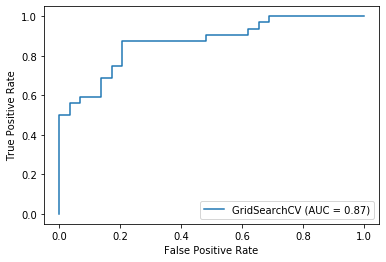

In [107]:
plot_roc_curve(gs_log_reg, X_test, y_test);

Vejamos a Confusion Matrix.

In [108]:
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 4, 28]])

Para melhor compreensão podemos usar a biblioteca **seaborn**.

In [109]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plota uma matriz de confusão com gráfico bonito
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

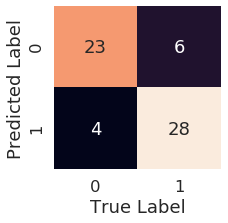

In [110]:
plot_conf_mat(y_test, y_preds)

Podemos observar que:

- Temos 6 falsos negativos
- Temos 4 falsos positios
- 51 acertos no total

Agora temos uma ROC Curve e uma Confusion Matrix, vamos para o classification report, assimo como uma avaliação cross-validated de precision, recall e f1-score.

In [113]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Lembre que esse classification report está sendo feito em apenas um split dos dados.

Por isso é importante fazermos uma avaliação cross-validated.

### Calcular Métricas de Avaliação usando Cross-Validation

Nós iremos calcular precision, recall e f1-score de nosso modelo usando cross-validation, para esta tarefa usaremos o método **cross_val_score()**.

Antes vamos checar os melhores hiperparâmetros.

In [114]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'max_iter': 100, 'solver': 'newton-cg'}

Criaremos um novo classificador com esses melhores hiperparâmetros.

In [115]:
clf = LogisticRegression(C=0.1082636733874054, solver='newton-cg', max_iter=100)

Cross-Validated Accuracy.

In [116]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.85245902, 0.85      , 0.75      ])

In [118]:
cv_acc.mean()

0.8347540983606556

Cross-Validated Precision

In [119]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision.mean()

0.8143977591036414

Cross-Validated Recall

In [120]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall.mean()

0.9090909090909092

Cross-Validated F1-Score

In [121]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1.mean()

0.8581674363006115

Visualizando as Métricas Cross-Validated

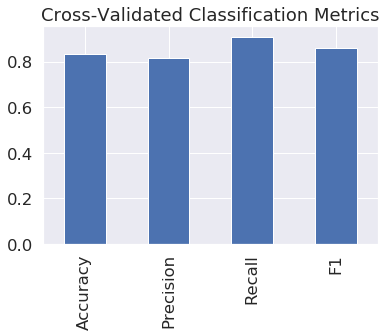

In [123]:
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc.mean(),
    "Precision": cv_precision.mean(),
    "Recall": cv_recall.mean(),
    "F1": cv_f1.mean()
},index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",legend=False);

### Importância das Features

Importância das Features é uma outra maneira de perguntarmos: "Quais features mais contribuiram para o resultado do modelo e como elas contribuiram?"

Encontrar a importância das features é diferente para cada modelo de Machine Learning.

Vamos então buscar a importância das features para o nosso modelo **LogisticRegression**.

Primeiramente vamos ajustar uma instância do algoritmo LogisticRegression.

In [124]:
clf = LogisticRegression(C=0.1082636733874054, solver='newton-cg', max_iter=100)

Ajustamos os dados.

In [125]:
clf.fit(X_train, y_train);

O atributo **coef_** nos informa o quanto cada atributo de nossos dados independentes (**X**) contribui para o desempenho de nosso modelo.

In [126]:
clf.coef_

array([[-0.0256964 , -0.62560141,  0.55273058, -0.01329223, -0.00238822,
        -0.05368662,  0.07765775,  0.020887  , -0.42483098, -0.54926636,
         0.34418779, -0.73070322, -0.61322934]])

Podemos confirmar que temos 13 números, pois temos 13 colunas.

In [128]:
len(clf.coef_[0])

13

Vamos corresponder os coeficientes de features com suas respectivas colunas.

In [129]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.0256964029940151,
 'sex': -0.6256014107541095,
 'cp': 0.5527305845174647,
 'trestbps': -0.013292231250021446,
 'chol': -0.0023882248140337414,
 'fbs': -0.053686615498385375,
 'restecg': 0.07765775384866487,
 'thalach': 0.020887002899646175,
 'exang': -0.4248309849197886,
 'oldpeak': -0.5492663612056305,
 'slope': 0.3441877883806427,
 'ca': -0.7307032207790524,
 'thal': -0.6132293387942042}

E agora podemos visualizar essas importâncias das features em um gráfico.

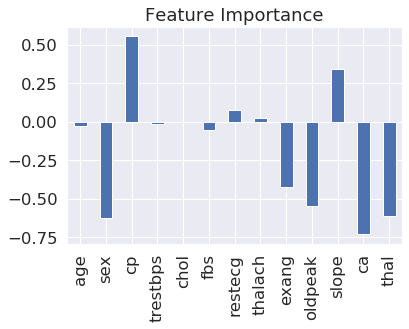

In [130]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

Alguns valores são positivos e outros negativos, e isso nos remete à tabela de correlação entre as colunas.

Podemos confirmar algumas correlações com o método **crosstab**.

In [131]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [132]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [136]:
pd.crosstab(df['ca'], df['target'])

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


## 6. Experimentação

Se eventualmente não alcançarmos a nossa meta de métrica de avaliação, podemos nos questionar:

- Podemos coletar mais dados?
- Podemos testar um modelo melhor? Por exemplo, CatBoost ou XGBoost.
- Podemos aprimorar os modelos atuais? (Além do que já fizemos)
- Se o nosso modelo é bom o suficiente (alcançamos a métrica de avaliação), como podemos fazer para exportar o modelo e compartilhá-lo com outras pessoas?